# CSC 410 Assignment 2


In [1]:
#~/usr/bin/env python
from data import get_dataset
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

### SVM Learner

First we load the volcanoes dataset and do a train test split of 70/30.

In [2]:
dataset_directory = 'data'
volcanoes_dataset = 'volcanoes'
vn_schema, VNX, VNy = get_dataset(volcanoes_dataset, dataset_directory)
VNX_train, VNX_test, VNy_train, VNy_test = train_test_split(VNX, VNy, 
                                                            test_size=0.3)

Reporting  the  accuracy,  precision,  recall  and  F1  score.  

              precision    recall  f1-score   support

          -1       0.86      0.96      0.90       435
           1       0.90      0.71      0.79       235

    accuracy                           0.87       670
   macro avg       0.88      0.83      0.85       670
weighted avg       0.87      0.87      0.86       670



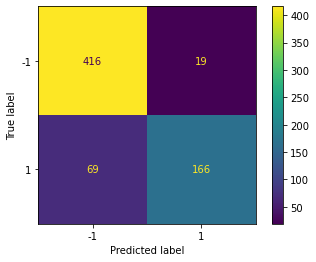

In [3]:
rbfClf = SVC(probability=True)
rbfClf = rbfClf.fit(VNX_train, VNy_train)
rbfPredictions = rbfClf.predict(VNX_test)
print(classification_report(VNy_test, rbfPredictions))


cm = confusion_matrix(VNy_test, rbfPredictions, labels=rbfClf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rbfClf.classes_)
disp.plot()
plt.show()

Is  the  accuracy  score  same  with  the precision?
> The accuracy is very close to precision.

Why?
> Accuracy is determined by $(TP+TN)/(P+N)$, whereas precision is derived from $TP/(TP+FP)$. The fact that those two numbers are the same or atleast similar indicates that the two ratios are similar. The true positives seem to be a large enough proportion as to equal the ratio given by accuracy. In essence the rbf model is as precise as it is accurate.

Plotting the Receiver Operating Characteristic (ROC) curve.

What is the area under ROC? 

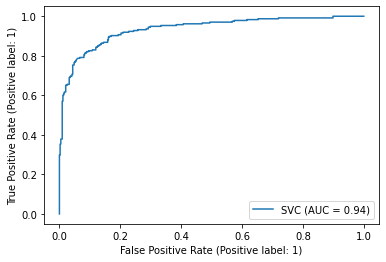

The AUC score is 0.9355832721936904.


In [4]:
RocCurveDisplay.from_estimator(
    rbfClf, VNX_test, VNy_test)

plt.show()
rbfAuc = roc_auc_score(VNy_test, rbfClf.predict_proba(VNX_test)[:,1])
print("The AUC score is %s." %(rbfAuc))

Evaluate the SVM classifiers built with three different kernel functions (radial basis function, 
polynomial and sigmoid) in terms of the area under ROC.

In [5]:
polyClf = SVC(kernel='poly', probability=True)
polyClf = polyClf.fit(VNX_train, VNy_train)
polyPredictions = polyClf.predict(VNX_test)

sigClf = SVC(kernel='sigmoid', gamma='auto',probability=True)
sigClf = sigClf.fit(VNX_train, VNy_train)
sigPredictions = sigClf.predict(VNX_test)

polyAuc = roc_auc_score(VNy_test, polyClf.predict_proba(VNX_test)[:,1])
sigAuc = roc_auc_score(VNy_test, sigClf.predict_proba(VNX_test)[:,1])

print("RBF AUC score = %s" %rbfAuc)
print("Polynomial AUC score = %s" %polyAuc)
print("Sigmoid AUC score = %s" %sigAuc)

RBF AUC score = 0.9355832721936904
Polynomial AUC score = 0.9115774027879677
Sigmoid AUC score = 0.5


Which one shows the best result?
>The rbf function appears to perform the best in terms of AUC score.

Why do we use kernels in machine learning?
>Using kernels allows us to analyze data that is not easily classified by organizing it into shapes that can be differentiated from one another and therefore can be analyzed.

### Naïve Bayes Learner

First we will load the voting and spam datasets.

In [6]:
dataset_directory = 'data'
voting_dataset = 'voting'
vt_schema, VTX, VTy = get_dataset(voting_dataset, dataset_directory)

dataset_directory = 'data'
spam_dataset = 'spam'
sp_schema, SX, Sy = get_dataset(spam_dataset, dataset_directory)

For the voting problem, perform five-fold cross validation to obtain training and testing sets for the 
Categorical Naïve Bayes Classifier.

What is the accuracy?

In [7]:
CatNB = CategoricalNB()
print("The mean accuracy score is %s." %(cross_val_score(CatNB, VTX, VTy, scoring='accuracy', cv=5).mean()))

The mean accuracy score is 0.9795454545454547.


For the spam problem, perform five-fold cross validation to obtain training and testing sets.

What is the accuracy of the Gaussian Naïve Bayes Classifier?

In [8]:
GausNB = GaussianNB()
print("The mean accuracy score when using the Gaussian Naïve Bayes learner is %s." 
      %(cross_val_score(GausNB, SX, Sy, scoring='accuracy', cv=5).mean()))

The mean accuracy score when using the Gaussian Naïve Bayes learner is 0.40251055468685815.


 What is the accuracy if we use the AdaBoost ensemble method with Decision Tree as the base classifier? 

In [9]:
AdaB = AdaBoostClassifier()
print("The mean accuracy score when using the AdaBoost ensemble learner is %s." 
      %(cross_val_score(AdaB, SX, Sy, scoring='accuracy', cv=5).mean()))

The mean accuracy score when using the AdaBoost ensemble learner is 0.7061385417127852.


Any difference of the values? 
>The AdaBoost learner is about 1.75x more accurate than the Gaussian learner for this dataset.

What do you think could be the reason?
>The Gaussian learner is at a disadvantage because it does not build off of previous folds it simply averages them, whereas the Adaptive boosting ensemble will build off of each test to classify more accurately which will in turn increase its mean accuracy score.